In [1]:
import splitfolders 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os
import pandas as pd
from PIL import Image as im
from sklearn.metrics import f1_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#split images into train,validation,test folders
input_folder="data/"
splitfolders.ratio(input_folder, output="dataset", seed=1337, ratio=(.6, .2, .2), group_prefix=None)

Copying files: 42000 files [09:02, 77.49 files/s] 


In [3]:
#Data preprocessing using Gaussian Blur and Thresholding
for folderName in os.listdir("dataset/"):
  for fileName in os.listdir("dataset/"+folderName):
     for file in os.listdir("dataset/"+folderName+'/'+fileName):
          image = cv2.imread('dataset/'+folderName+'/'+fileName+'/'+file)
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          blur = cv2.GaussianBlur(gray,(35,35),2)
          th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
          ret, res = cv2.threshold(th3, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
          res=im.fromarray(res)
          res.save('dataset/'+folderName+'/'+fileName+'/'+file)

In [4]:
#count of images in each folders
trainCount = 0
for folderName in os.listdir("dataset/train"):
    lis = os.listdir("dataset/train/"+folderName)
    trainCount += len(lis)
print('train image count =' , trainCount)

testCount = 0
for folderName in os.listdir("dataset/test"):
    lis = os.listdir("dataset/test/"+folderName)
    testCount += len(lis)
print('test image count =' , testCount)

valCount=0
for folderName in os.listdir("dataset/val"):
    lis = os.listdir("dataset/val/"+folderName)
    valCount += len(lis)
print('validation image count =' , valCount)

train image count = 25200
test image count = 8400
validation image count = 8400


In [2]:
train_path = r'dataset/train'
val_path = r'dataset/val'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(128,128), class_mode='categorical', batch_size=10,shuffle=True)
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path, target_size=(128,128), class_mode='categorical', batch_size=10, shuffle=True)

Found 25200 images belonging to 35 classes.
Found 8400 images belonging to 35 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

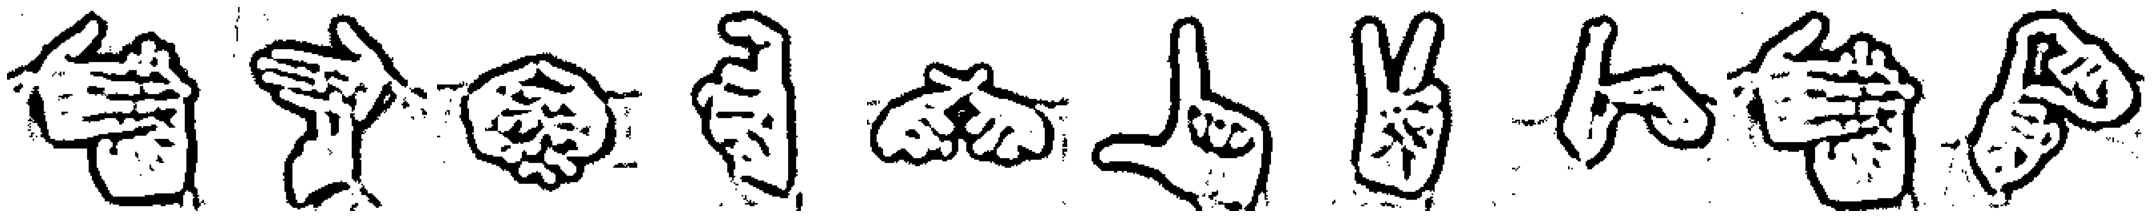

(10, 128, 128, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
#plotting images
imgs, labels = next(train_batches)
import matplotlib.pyplot as plt

#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('dataset/train',target_size=(128, 128),batch_size=10,color_mode='grayscale',class_mode='categorical')
val_set = val_datagen.flow_from_directory('dataset/val',target_size=(128 , 128),batch_size=10,color_mode='grayscale',class_mode='categorical') 

Found 25200 images belonging to 35 classes.
Found 8400 images belonging to 35 classes.


In [5]:
#CNN algorithm process(model learning)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.40))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.40))
model.add(Dense(64,activation ="relu"))
model.add(Dense(35,activation ="softmax"))

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [7]:
print(train_datagen)
print(val_datagen)
print(training_set)
print(val_set)

In [8]:
history = model.fit(training_set, epochs=10,  validation_data = val_set)

Epoch 1/10
2520/2520 [==============================] - 1103s 437ms/step - loss: 1.0392 - accuracy: 0.6823 - val_loss: 0.0062 - val_accuracy: 0.9989
Epoch 2/10
2520/2520 [==============================] - 496s 197ms/step - loss: 0.2362 - accuracy: 0.9230 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 3/10
2520/2520 [==============================] - 423s 168ms/step - loss: 0.1463 - accuracy: 0.9519 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 4/10
2520/2520 [==============================] - 417s 165ms/step - loss: 0.1095 - accuracy: 0.9656 - val_loss: 8.2672e-04 - val_accuracy: 0.9998
Epoch 5/10
2520/2520 [==============================] - 418s 166ms/step - loss: 0.0850 - accuracy: 0.9731 - val_loss: 2.5692e-04 - val_accuracy: 1.0000
Epoch 6/10
2520/2520 [==============================] - 420s 166ms/step - loss: 0.0768 - accuracy: 0.9765 - val_loss: 8.3045e-05 - val_accuracy: 1.0000
Epoch 7/10
2520/2520 [==============================] - 420s 167ms/step - loss: 0.0649 - accuracy: 

In [9]:
imgs, labels = next(val_set) 
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
#Once the model is fitted we save the model using model.save()  function.
model.save('model_data.h5')

loss of 0.0; accuracy of 100.0%


In [2]:
model=keras.models.load_model(r"model_data.h5")

In [11]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


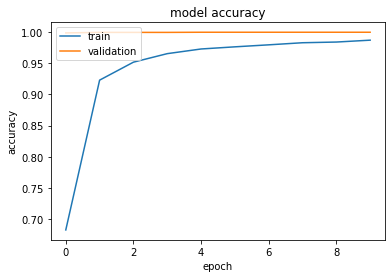

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

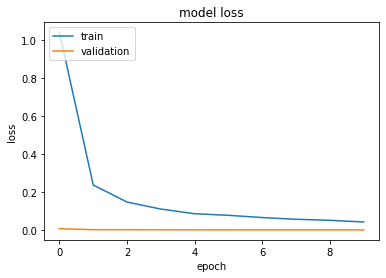

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4]:
resArr = [1,2,3,4,5,6,7,8,9,'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [16]:
def predicting(imgLoc):
  imagePrid = im.open(imgLoc)
  imagePred = np.asarray(imagePrid)
  imagePred = np.expand_dims(imagePred,axis=0)
  prediction = model.predict(imagePred)
    
  try:
    position = np.where(prediction==1.0)
    SignRepresentation = resArr[position[1][0]]  
    return SignRepresentation
  except:
    return 'unknown'

In [17]:
#prediction of test images
correct = total = 0
count = 1
arr = []
for folderName in os.listdir("dataset/test"):
  for fileName in os.listdir("dataset/test/"+folderName):
    picName = str("dataset/test/"+folderName+"/"+fileName)
    y_true = folderName
    y_pred = predicting(picName)
    arr.append([y_true,y_pred])
    if str(y_true) == str(y_pred):
      correct += 1
    total += 1
    count += 1
  
print('correct:',correct, '\ttotal:' , total)

correct: 8400 	total: 8400


In [18]:
arr = np.array(arr)
y_true=arr[:,0]
y_pred=arr[:,1]

In [19]:
np.unique(y_true)

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',
       'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U11')

In [20]:
np.unique(y_pred)

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',
       'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U11')

In [21]:
print("f1_score = ",f1_score(y_true,y_pred,average="macro"))

f1_score =  1.0


In [22]:
report=classification_report(y_true,y_pred,output_dict=True)
report=pd.DataFrame(report).transpose()
report

,precision,recall,f1-score,support
1,1.0,1.0,1.0,240.0
2,1.0,1.0,1.0,240.0
3,1.0,1.0,1.0,240.0
4,1.0,1.0,1.0,240.0
5,1.0,1.0,1.0,240.0
6,1.0,1.0,1.0,240.0
7,1.0,1.0,1.0,240.0
8,1.0,1.0,1.0,240.0
9,1.0,1.0,1.0,240.0
A,1.0,1.0,1.0,240.0


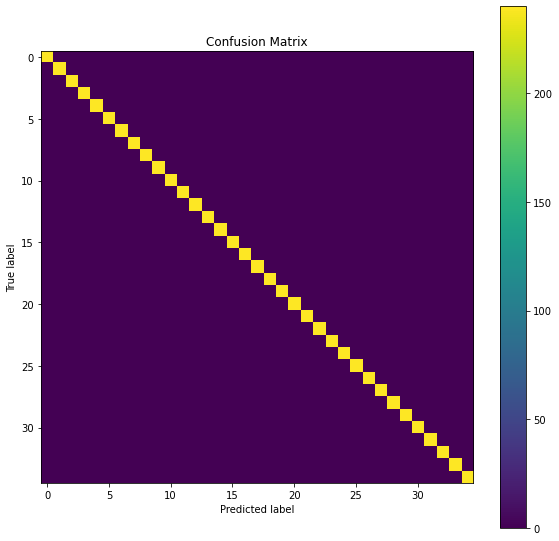

In [23]:
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()

In [3]:
dic = {0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'A',10:'B',11:'C',12:'D',13:'E',14:'F',15:'G',16:'H',17:'I',18:'J',19:'K',20:'L',
              21:'M',22:'N',23:'O',24:'P',25:'Q',26:'R',27:'S',28:'T',29:'U',30:'V',31:'W',32:'X',33:'Y',34:'Z'}
braille = ["⠼⠁", "⠼⠃", "⠼⠉", "⠼⠙", "⠼⠑", "⠼⠋", "⠼⠛", "⠼⠓", "⠼⠚","⠁", "⠃", "⠉", "⠙", "⠑", "⠋", "⠛", "⠓", "⠊", "⠚", "⠅", "⠇",
 "⠍", "⠝", "⠕", "⠏", "⠟", "⠗", "⠎", "⠞", "⠥", "⠧", "⠺", "⠭", "⠽", "⠵"," "]
alpha_num = ['1', '2', '3', '4', '5', '6', '7', '8', '9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',' ']

In [4]:
#Signs capturing
vid=cv2.VideoCapture(0)
while True:
    ret,frame=vid.read();
    frame=cv2.flip(frame,1)
    x1 = int(0.6*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.4*frame.shape[1])
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255,0,0) ,1)
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (128, 128)) 
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, 62, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    cv2.imshow('Thresholded',res)
    result=model.predict(res.reshape(1,128,128,1))
    cv2.putText(frame, "Character: ", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2) 
    cv2.putText(frame,dic[np.argmax(result)] , (200, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2) 
    cv2.imshow("Frame", frame)
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
 
    
cv2.destroyAllWindows()
vid.release()        

In [8]:
#braille code for predicted character
print(dic[np.argmax(result)])
print(braille[alpha_num.index(dic[np.argmax(result)])])

V
⠧
